**Project #2 – Computer Science Algorithms**

Background – Recursive algorithms, search algorithms, and sorting algorithms are often common
interview questions. Yes, even for data scientists! Implement either the recursive algorithm or search
algorithm prompt below.

*Recursion*

Recursion is a powerful tool and an important concept in computer science. A recursive function is one that
calls itself. A recursive function consists of two parts:

1. The base case(s): the case(s) containing the solution to the simplest/smallest form of the problem. At this point, the solution can be stated non-recursively.
    
1. The recursive case: the case in which the function calls itself on a simpler/smaller version of the problem.
    
If you’re confused, just remember that in order to understand recursion, you must first understand
recursion.

The mathematical concept of factorial ($n!=$ the product of all positive integers less than or equal to n, e.g.
$5!=5\times4\times3\times2\times1=120$) is an example of a problem that can be solved recursively. Below are example
functions that solve factorial iteratively and recursively, as well as one that compares the time it took for
your computer to solve n! using each method.

1. Walk through each algorithm (pen and paper) using $n = 5$ and make sure that you understand how each function works.

**Iterative Factorial - sequential for loop**

n = 5

factorial = 1

for i in range 5 to 1, step size -1

 i = 5, factorial x= n => 1 x 5 = 5, n -= 1 => 5 - 1 = 4

 i = 4, factorial x= n => 5 x 4 = 20, n -= 1 => 4 - 1 = 3

 i = 3, factorial x= n => 20 x 3 = 60, n -= 1 => 3 - 1 = 2

 i = 2, factorial x= n => 60 x 2 = 120, n -= 1 => 2 - 1 = 1

 i = 1, factorial x= n => 120 x 1 = 120, n -= 1 => 1 - 1 = 1

factorial = 120
 
**Recursive Factorial**

 n = 5

 if n<=1
    return 1 (base case)

 return n x recursive_factorial(n-1)
 
5 x recursive_factorial(4)

5 x 4 x recursive_factorial(3)

5 x 4 x 3 x recursive_factorial(2)

5 x 4 x 3 x 2 recursive_factorial(1)

5 x 4 x 3 x 2 x 1

120
 

Implementation in code of iterative vs recursive vs native python implementation of factorial calculation.

In [ ]:
import time
import math
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(2000)
%matplotlib inline

# function for calculating factorials iteratively
def iterative_factorial(n):
    factorial = 1
    for i in range(n, 1, -1):
        factorial *= n
        n -= 1
    return factorial

# function for calculating factorials recursively
def recursive_factorial(n):
    if n<= 1:
        return 1
    return n * recursive_factorial(n-1)

# function for capturing the elapsed time to calculate n! using one of three specified algorithm
# output is a dict with algorithm types as keys and times as values
def factorial_compare(n, algorithm_type):
    start_time = time.time()
    if algorithm_type == 'iterative':
        iterative_factorial(n)
    elif algorithm_type == 'recursive':
        recursive_factorial(n)
    else:
        math.factorial(n)
    time_dict[algorithm_type].append(time.time() - start_time)
    
# collect the calculation times for each of the factorial algorithm types as n increases
factorial_types = ['iterative', 'recursive', 'math']    
time_dict = {k: [] for k in factorial_types}    
n_points = list(range(50, 2000, 50))
for n in n_points:
    for factorial_type in factorial_types:
        factorial_compare(n, factorial_type)

# plot calculation time vs n for each factorial algorithm type       
plt.figure(figsize=(15, 10))
for k, v in time_dict.items():
    plt.plot(n_points, v, label=k)     

plt.ylim(ymin=0, ymax=0.003)
plt.legend()
plt.title("Time to Calculate n!")
plt.savefig("factorial_times.png", transparent=False)
plt.show();

Recursion while more compact in code and perhaps more elegant, actually runs about 2x as long as iterative. Some research on google suggests that it is due to repeated function calls and stack usage. Moreover, we can exceed the limits on recursion depth if we go to range(50, 2050, 50). As expected, the native python function has been optimized as part of the .math library

This code repeats the above analysis, but does it for the Fibonacci sequence. This sequence is defined as: $F_n = F_{n-1} + F_{n-2}$, where the sequence is seeded with either: $F_0=0,\ F_1=1\ \ or\ \   F_1=1,\ F_2=2$.

Do you want to start the series with 0 or 1? 0


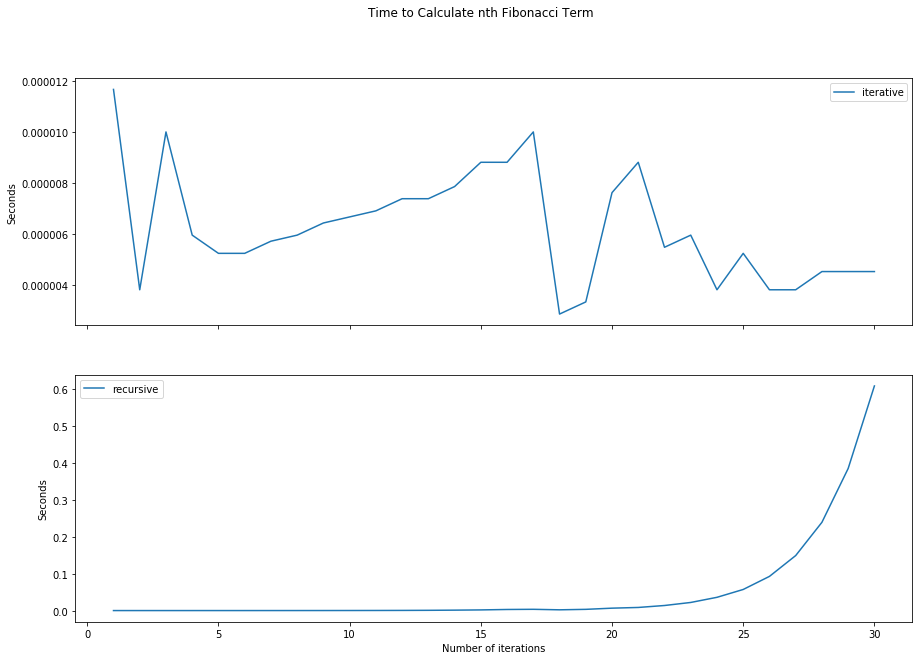

In [7]:
import time
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# comparision of the time required for each Fibonacci algorithm to run
# original Fibonacci definition historicallly starts with 1, 1, but more modern usage starts with 0, 1
def fibonacci_start(n, start):
    modern_start = [0, 1]
    historical_start = [1, 1]
    if start == 0:
        return modern_start[n - 1]
    elif start == 1:
        return historical_start[n - 1]

# function for calculating nth Fibonacci term iteratively
def iterative_fibonacci(n, start):
    if n < 3:
        return fibonacci_start(n, start)
    else:
        last_term = 1
        previous_term = start
        for i in range(3, n+1):
            next_term = last_term + previous_term
            previous_term = last_term
            last_term = next_term
        return last_term

# function for calculating nth Fibonacci term recursively
def recursive_fibonacci(n, start):
    if n < 3:
        return fibonacci_start(n, start)
    else:
        return recursive_fibonacci(n-1, start) + recursive_fibonacci(n-2, start)

def fibonacci_compare(n, start, algorithm_type):
    start_time = time.time()
    if algorithm_type == 'iterative':
        iterative_fibonacci(n, start)
    elif algorithm_type == 'recursive':
        recursive_fibonacci(n, start)
    return time.time() - start_time
    
# collect the calculation times for two Fibonacci algorithm types
algorithm_types = ['iterative', 'recursive']
time_dict = {k: [] for k in algorithm_types}
n_points = list(range(1, 31, 1))

start = -1
while (start + 1 != 1) and (start + 1 != 2):
    start = int(input("Do you want to start the series with 0 or 1? "))

for n in n_points:
    for algorithm_type in algorithm_types:
        time_elapsed = fibonacci_compare(n, start, algorithm_type)
        time_dict[algorithm_type].append(time_elapsed)
   
f, axes = plt.subplots(2, sharex=True, figsize=(15,10))
for k, v in time_dict.items():
    axis_index = algorithm_types.index(k)
    axes[axis_index].plot(n_points, v, label=k)
    axes[axis_index].set_ylabel('Seconds')
    axes[axis_index].legend()

axes[1].set_xlabel('Number of iterations')
f.suptitle('Time to Calculate nth Fibonacci Term')
plt.show();